In [3]:
# %pip install piqture

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms

from piqture.data_loader.mnist_data_loader import load_mnist_dataset
from piqture.transforms import MinMaxNormalization

In [6]:
train_dataset, test_dataset = load_mnist_dataset()

#### Define the normalization transform

In [7]:
min_max_normalization = MinMaxNormalization(normalize_min=0.0, normalize_max=1.0)

#### Define the full transformation pipeline for the dataset - Convert PIL image to Tensor and Apply MinMaxNormalization

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: min_max_normalization(x)
])

#### Apply transformation to dataset

In [9]:
train_dataset = [(min_max_normalization(image), label) for image, label in train_dataset]
test_dataset = [(min_max_normalization(image), label) for image, label in test_dataset]

  #### Increase batch size to 128

In [10]:
batch_size = 128

#### Create DataLoader instances with the new batch size

In [11]:

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#### Define model

In [12]:
class QuantumCNN(nn.Module):
    def __init__(self, input_size, num_classes=10):
        super(QuantumCNN, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, 128) 
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

#### Initialize model, criterion, and optimizer

In [13]:
input_size = 28 * 28
num_classes = 10

model = QuantumCNN(input_size=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Training loop

In [14]:
batch_size = 64
num_epochs = 30

losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = correct_predictions / total_samples * 100

    losses.append(epoch_loss)
    accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch 1/30, Loss: 0.4184, Accuracy: 88.85%
Epoch 2/30, Loss: 0.2892, Accuracy: 91.83%
Epoch 3/30, Loss: 0.2768, Accuracy: 92.22%
Epoch 4/30, Loss: 0.2698, Accuracy: 92.48%
Epoch 5/30, Loss: 0.2649, Accuracy: 92.66%
Epoch 6/30, Loss: 0.2624, Accuracy: 92.67%
Epoch 7/30, Loss: 0.2599, Accuracy: 92.78%
Epoch 8/30, Loss: 0.2571, Accuracy: 92.92%
Epoch 9/30, Loss: 0.2557, Accuracy: 92.93%
Epoch 10/30, Loss: 0.2536, Accuracy: 92.89%
Epoch 11/30, Loss: 0.2521, Accuracy: 93.02%
Epoch 12/30, Loss: 0.2514, Accuracy: 92.97%
Epoch 13/30, Loss: 0.2508, Accuracy: 93.06%
Epoch 14/30, Loss: 0.2492, Accuracy: 93.08%
Epoch 15/30, Loss: 0.2487, Accuracy: 93.05%
Epoch 16/30, Loss: 0.2477, Accuracy: 93.06%
Epoch 17/30, Loss: 0.2469, Accuracy: 93.06%
Epoch 18/30, Loss: 0.2462, Accuracy: 93.08%
Epoch 19/30, Loss: 0.2458, Accuracy: 93.08%
Epoch 20/30, Loss: 0.2459, Accuracy: 93.14%
Epoch 21/30, Loss: 0.2437, Accuracy: 93.15%
Epoch 22/30, Loss: 0.2448, Accuracy: 93.19%
Epoch 23/30, Loss: 0.2438, Accuracy: 93.1

#### Plotting Loss & Accuracy

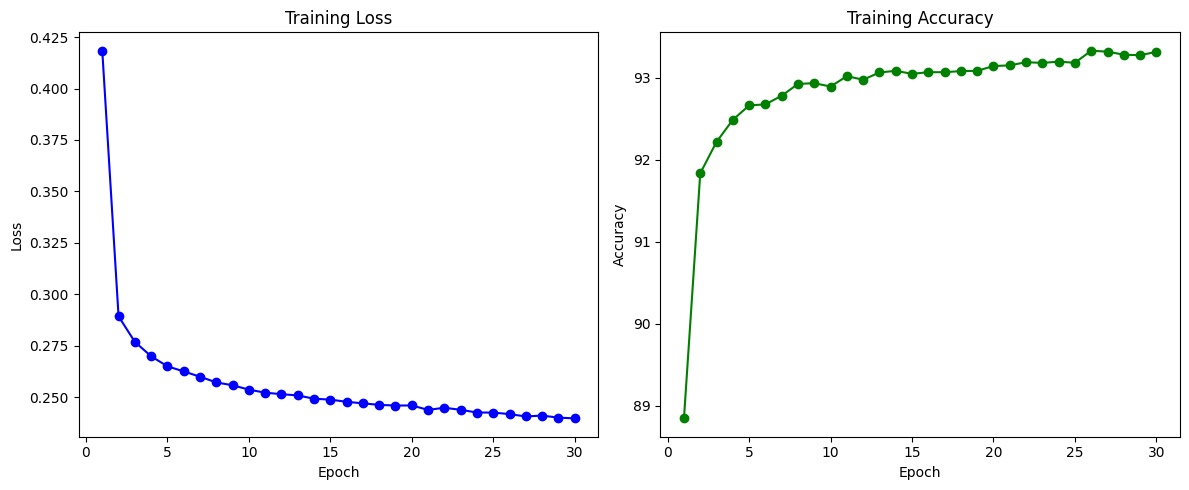

In [15]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, marker='o', linestyle='-', color='g')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()